In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("E-Commerce Churn Data.csv")
df.shape

(5630, 20)

In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())

Rows     :  5630
Columns  :  20

Features : 
 ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Unique values :  
 CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
Co

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df = df.replace(" ", np.NaN)
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [6]:
missing_data = df.isnull()

In [7]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

CustomerID
False    5630
Name: CustomerID, dtype: int64

Churn
False    5630
Name: Churn, dtype: int64

Tenure
False    5366
True      264
Name: Tenure, dtype: int64

PreferredLoginDevice
False    5630
Name: PreferredLoginDevice, dtype: int64

CityTier
False    5630
Name: CityTier, dtype: int64

WarehouseToHome
False    5379
True      251
Name: WarehouseToHome, dtype: int64

PreferredPaymentMode
False    5630
Name: PreferredPaymentMode, dtype: int64

Gender
False    5630
Name: Gender, dtype: int64

HourSpendOnApp
False    5375
True      255
Name: HourSpendOnApp, dtype: int64

NumberOfDeviceRegistered
False    5630
Name: NumberOfDeviceRegistered, dtype: int64

PreferedOrderCat
False    5630
Name: PreferedOrderCat, dtype: int64

SatisfactionScore
False    5630
Name: SatisfactionScore, dtype: int64

MaritalStatus
False    5630
Name: MaritalStatus, dtype: int64

NumberOfAddress
False    5630
Name: NumberOfAddress, dtype: int64

Complain
False    5630
Name: Complain, dtype: int64

OrderAmou

In [8]:
#Dropping null values from Tenure column which contain 5% missing data 
df = df[df["Tenure"].notnull()]
df = df.reset_index()[df.columns]

#convert to float type
df["Tenure"] = df["Tenure"].astype(float)

In [9]:
l = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for i in l:
    print(i, ":", df[i].unique())

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode : ['Debit Card' 'CC' 'E wallet' 'Cash on Delivery' 'COD' 'Credit Card' 'UPI']
Gender : ['Female' 'Male']
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus : ['Single' 'Divorced' 'Married']


In [10]:
#Replace 'Mobile Phone', 'Phone' to 'Mobile' for the following 2 columns
replace_cols = [ 'PreferredLoginDevice', 'PreferedOrderCat']
for i in replace_cols : 
    df[i]  = df[i].replace({'Mobile Phone' : 'Mobile', 'Phone' : 'Mobile' })

In [11]:
#Replace 'Cash on Delivery' to 'COD', 'Credit Card' to 'CC' and 'Debit Card' to 'DD' Mobile' for the 'PreferredPaymentMode' column.
replace_cols = [ 'PreferredPaymentMode']
for i in replace_cols : 
    df[i]  = df[i].replace({'Cash on Delivery' : 'COD', 'Credit Card' : 'CC', 'Debit Card' : 'DC'})

In [12]:
l = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for i in l:
    print(i, ":", df[i].unique())

PreferredLoginDevice : ['Mobile' 'Computer']
PreferredPaymentMode : ['DC' 'CC' 'E wallet' 'COD' 'UPI']
Gender : ['Female' 'Male']
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']
MaritalStatus : ['Single' 'Divorced' 'Married']


In [13]:
df['Tenure'].unique()

array([ 4.,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
        1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15., 22.,
       27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [14]:
# Convert Tenure to categorical column
def tenure_lab(df) :
    
    if df["Tenure"] <= 12 :
        return "Tenure_lt_12"
    elif (df["Tenure"] > 12) & (df["Tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["Tenure"] > 24) & (df["Tenure"] <= 48) :
        return "Tenure_24-48"
    elif df["Tenure"] > 48 :
        return "Tenure_gt_48"

df["tenure_group"] = df.apply(lambda df:tenure_lab(df),
                                      axis = 1)

In [15]:
df['tenure_group'].unique()

array(['Tenure_lt_12', 'Tenure_12-24', 'Tenure_24-48', 'Tenure_gt_48'],
      dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5366 non-null   int64  
 1   Churn                        5366 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5366 non-null   object 
 4   CityTier                     5366 non-null   int64  
 5   WarehouseToHome              5115 non-null   float64
 6   PreferredPaymentMode         5366 non-null   object 
 7   Gender                       5366 non-null   object 
 8   HourSpendOnApp               5111 non-null   float64
 9   NumberOfDeviceRegistered     5366 non-null   int64  
 10  PreferedOrderCat             5366 non-null   object 
 11  SatisfactionScore            5366 non-null   int64  
 12  MaritalStatus                5366 non-null   object 
 13  NumberOfAddress   

In [17]:
df[df['WarehouseToHome'].isnull()]['Churn'].sum()
#df['WarehouseToHome'].unique()

84

In [18]:
df.keys().tolist()

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'tenure_group']

In [19]:
df.nunique()[df.nunique() < 6].keys().tolist()

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain',
 'tenure_group']

In [20]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
tenure_group                     0
dtype: int64

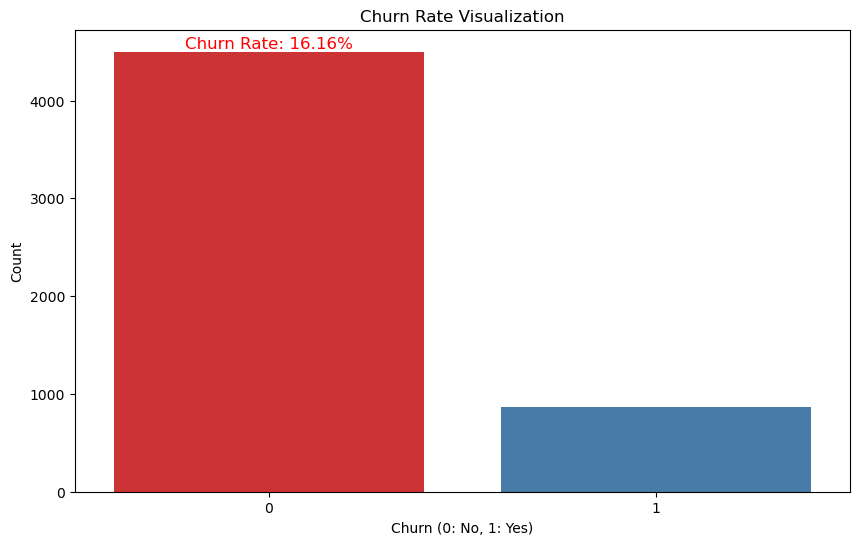

In [21]:
churn_counts = df['Churn'].value_counts()
churn_rate = churn_counts[1] / len(df)  # Churn rate as a percentage

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set1')
plt.title('Churn Rate Visualization')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.text(0, churn_counts[0], f'Churn Rate: {churn_rate:.2%}', ha='center', va='bottom', fontsize=12, color='red')

plt.show()


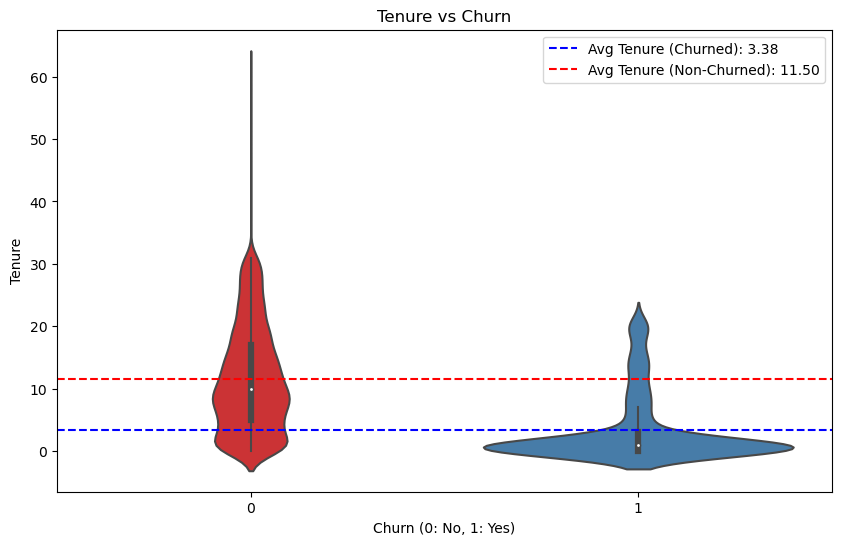

In [22]:
average_tenure_churned = df[df['Churn'] == 1]['Tenure'].mean()
average_tenure_non_churned = df[df['Churn'] == 0]['Tenure'].mean()

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Tenure', data=df, palette='Set1')
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Tenure')

# Add average lines
plt.axhline(average_tenure_churned, color='blue', linestyle='dashed', label=f'Avg Tenure (Churned): {average_tenure_churned:.2f}')
plt.axhline(average_tenure_non_churned, color='red', linestyle='dashed', label=f'Avg Tenure (Non-Churned): {average_tenure_non_churned:.2f}')

# Show legend
plt.legend()

plt.show()

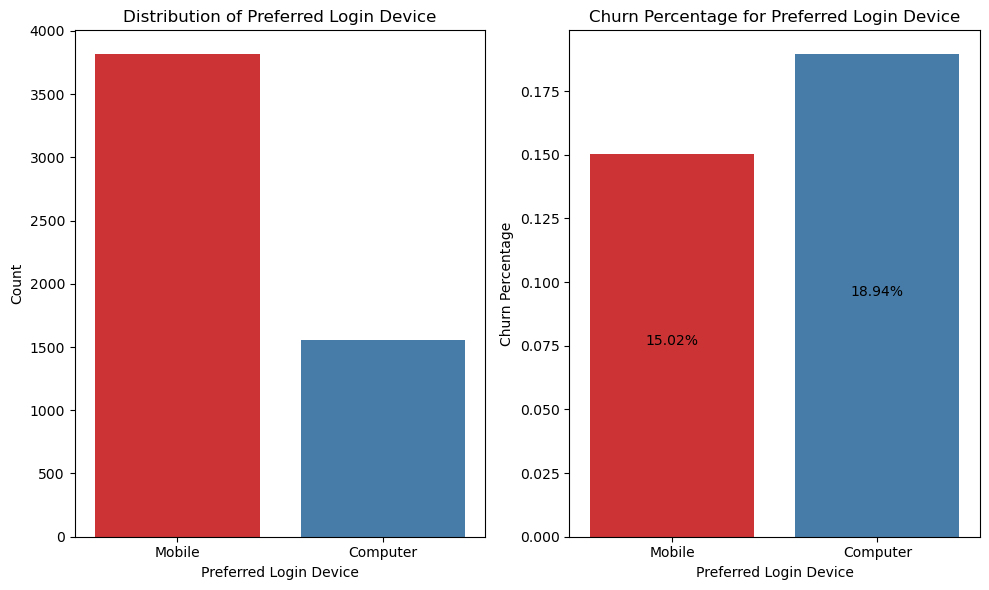

In [23]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of Preferred Login Device
sns.countplot(x='PreferredLoginDevice', data=df, palette='Set1', ax=ax1)
ax1.set_title('Distribution of Preferred Login Device')
ax1.set_xlabel('Preferred Login Device')
ax1.set_ylabel('Count')

# Plot the churn percentage for Preferred Login Device
ax2 = sns.barplot(x='PreferredLoginDevice', y='Churn', data=df, palette='Set1', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for Preferred Login Device')
ax2.set_xlabel('Preferred Login Device')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2.),
                 ha='center', va='baseline')

plt.tight_layout()
plt.show()


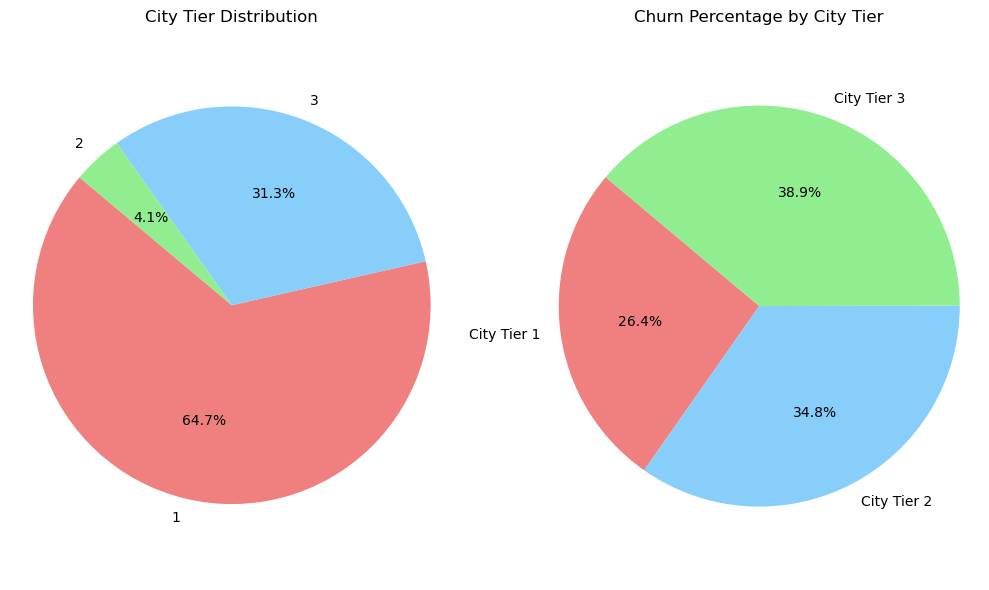

In [24]:
# City Tier Distribution
city_tier_counts = df['CityTier'].value_counts()
city_labels = city_tier_counts.index
city_sizes = city_tier_counts.values

# Churn Percentage by City Tier
churn_percentage = df.groupby('CityTier')['Churn'].mean() * 100
churn_labels = [f'City Tier {tier}' for tier in churn_percentage.index]
churn_sizes = churn_percentage.values

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Subplot 1: City Tier Distribution
axes[0].pie(city_sizes, labels=city_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
axes[0].set_title('City Tier Distribution')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Subplot 2: Churn Percentage by City Tier
axes[1].pie(churn_sizes, labels=churn_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
axes[1].set_title('Churn Percentage by City Tier')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


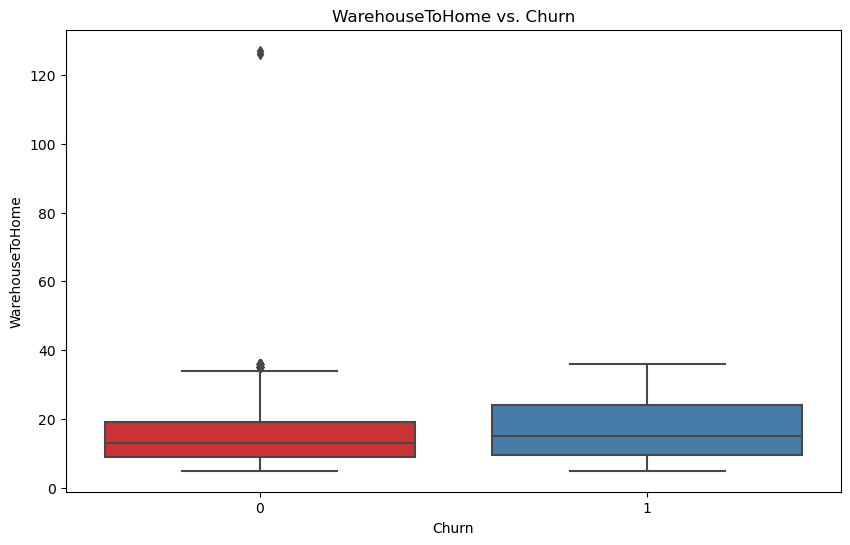

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='WarehouseToHome', data=df, palette='Set1')
plt.title('WarehouseToHome vs. Churn')
plt.xlabel('Churn')
plt.ylabel('WarehouseToHome')
plt.show()

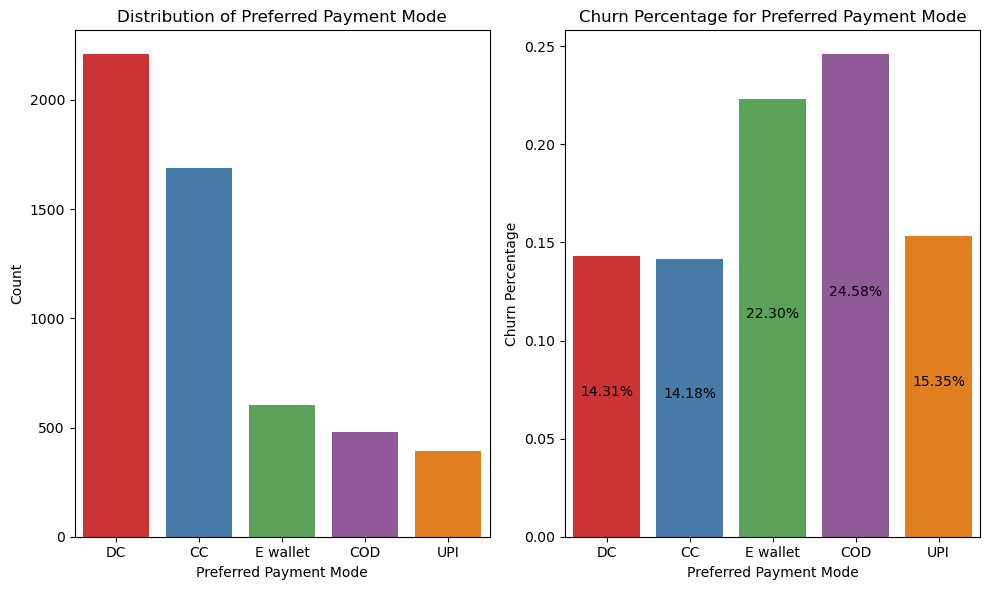

In [26]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of Preferred Payment Mode
sns.countplot(x='PreferredPaymentMode', data=df, palette='Set1', ax=ax1)
ax1.set_title('Distribution of Preferred Payment Mode')
ax1.set_xlabel('Preferred Payment Mode')
ax1.set_ylabel('Count')

# Plot the churn percentage for Preferred Payment Mode
ax2 = sns.barplot(x='PreferredPaymentMode', y='Churn', data=df, palette='Set1', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for Preferred Payment Mode')
ax2.set_xlabel('Preferred Payment Mode')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the first subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2.),
                 ha='center', va='baseline')

plt.tight_layout()
plt.show()


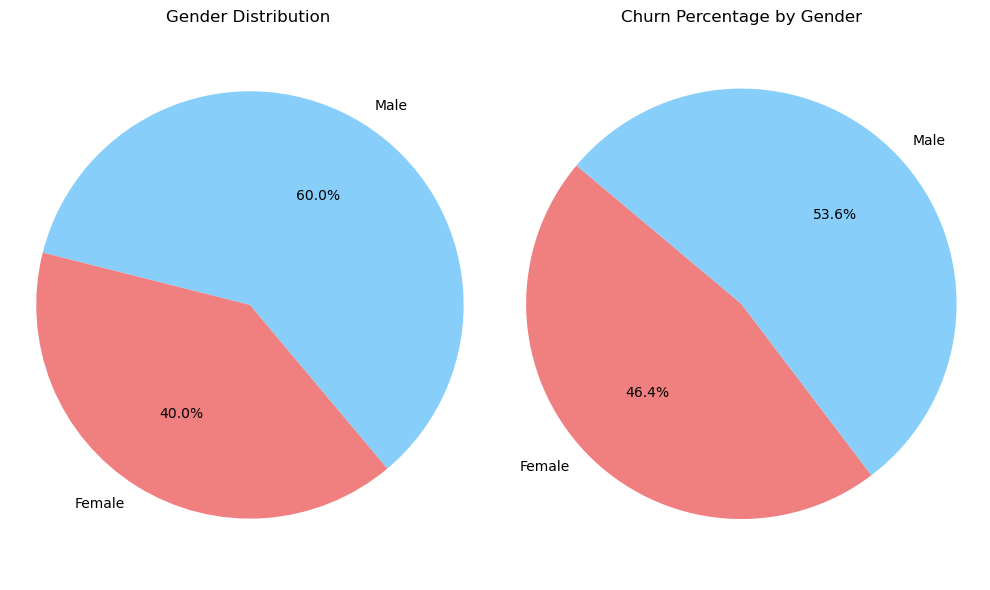

In [27]:
# Gender Distribution
Gender_counts = df['Gender'].value_counts()
Gender_labels = Gender_counts.index
Gender_sizes = Gender_counts.values

# Churn Percentage by Gender
churn_percentage = df.groupby('Gender')['Churn'].mean() * 100
churn_labels = [f'{tier}' for tier in churn_percentage.index]
churn_sizes = churn_percentage.values

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Subplot 1: Gender Distribution Pie Chart
axes[0].pie(Gender_sizes, labels=Gender_labels, autopct='%1.1f%%', startangle=310, colors=['lightskyblue', 'lightcoral'])
axes[0].set_title('Gender Distribution')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Subplot 2: Churn Percentage by Gender Pie Chart
axes[1].pie(churn_sizes, labels=churn_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('Churn Percentage by Gender')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


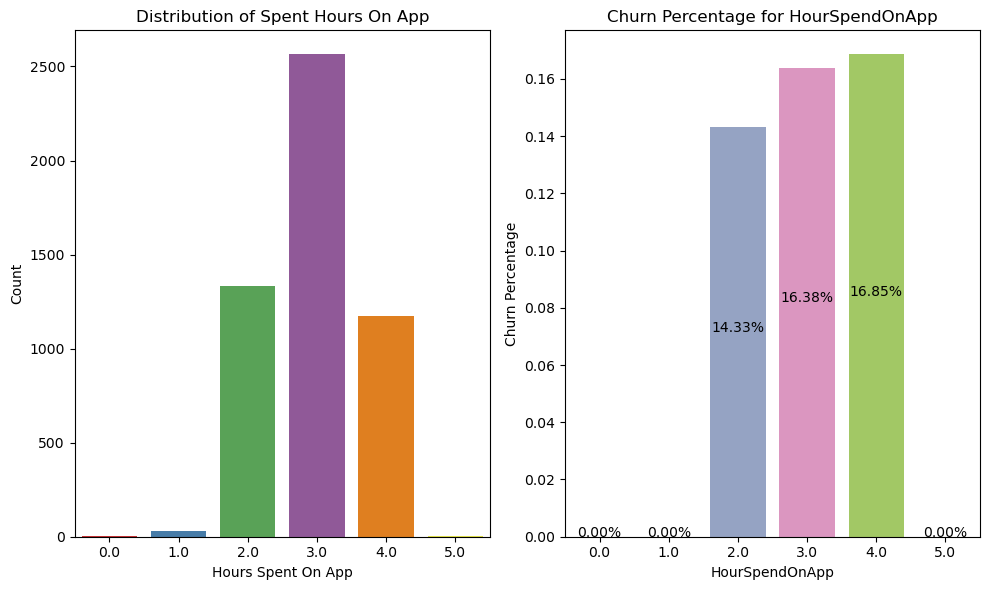

In [28]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of HourSpendOnApp
sns.countplot(x='HourSpendOnApp', data=df, palette='Set1', ax=ax1)
ax1.set_title('Distribution of Spent Hours On App')
ax1.set_xlabel('Hours Spent On App')
ax1.set_ylabel('Count')

# Plot the churn percentage for HourSpendOnApp
ax2 = sns.barplot(x='HourSpendOnApp', y='Churn', data=df, palette='Set2', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for HourSpendOnApp')
ax2.set_xlabel('HourSpendOnApp')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the first subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2.),
                 ha='center', va='baseline')

plt.tight_layout()
plt.show()


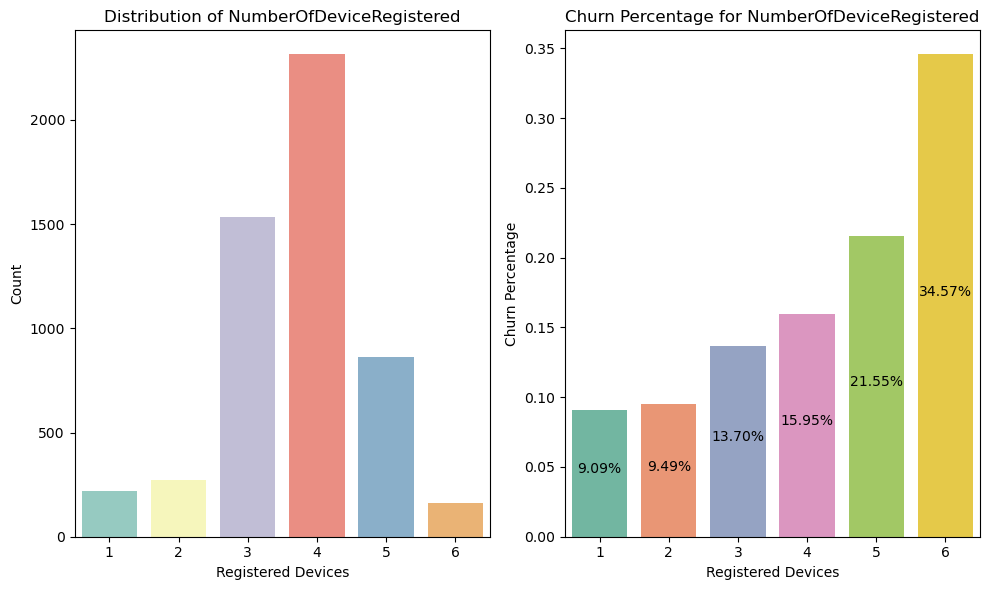

In [29]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of NumberOfDeviceRegistered
sns.countplot(x='NumberOfDeviceRegistered', data=df, palette='Set3', ax=ax1)
ax1.set_title('Distribution of NumberOfDeviceRegistered')
ax1.set_xlabel('Registered Devices')
ax1.set_ylabel('Count')

# Plot the churn percentage for NumberOfDeviceRegistered
ax2 = sns.barplot(x='NumberOfDeviceRegistered', y='Churn', data=df, palette='Set2', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for NumberOfDeviceRegistered')
ax2.set_xlabel('Registered Devices')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the first subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2.),
                 ha='center', va='baseline')

plt.tight_layout()
plt.show()


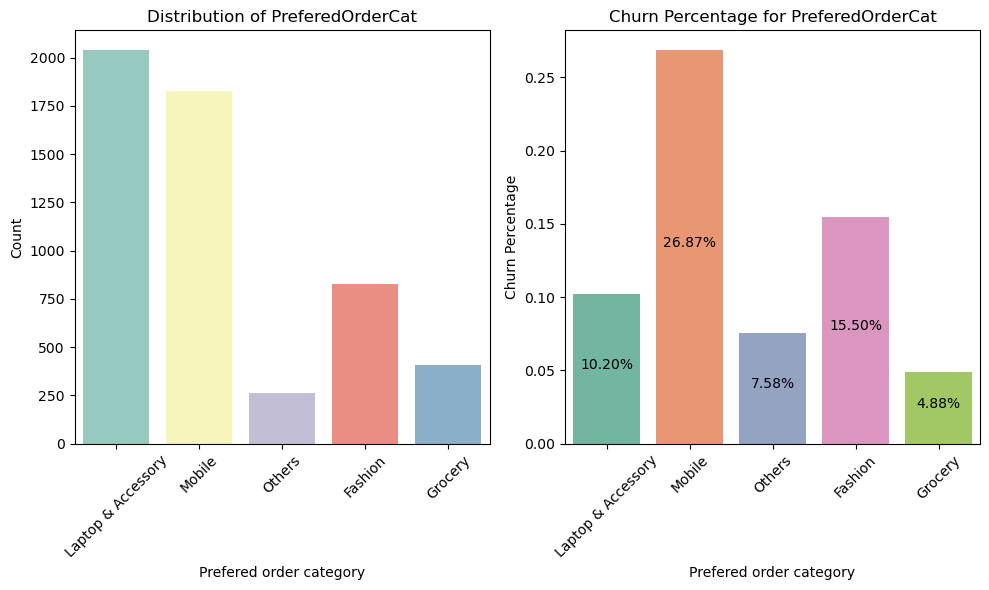

In [30]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of PreferedOrderCat
sns.countplot(x='PreferedOrderCat', data=df, palette='Set3', ax=ax1)
ax1.set_title('Distribution of PreferedOrderCat')
ax1.set_xlabel('Prefered order category')
ax1.set_ylabel('Count')
# Rotate x-axis labels of ax1 plot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot the churn percentage for PreferedOrderCat
ax2 = sns.barplot(x='PreferedOrderCat', y='Churn', data=df, palette='Set2', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for PreferedOrderCat')
ax2.set_xlabel('Prefered order category')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the first subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height/2.),
                 ha='center', va='baseline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


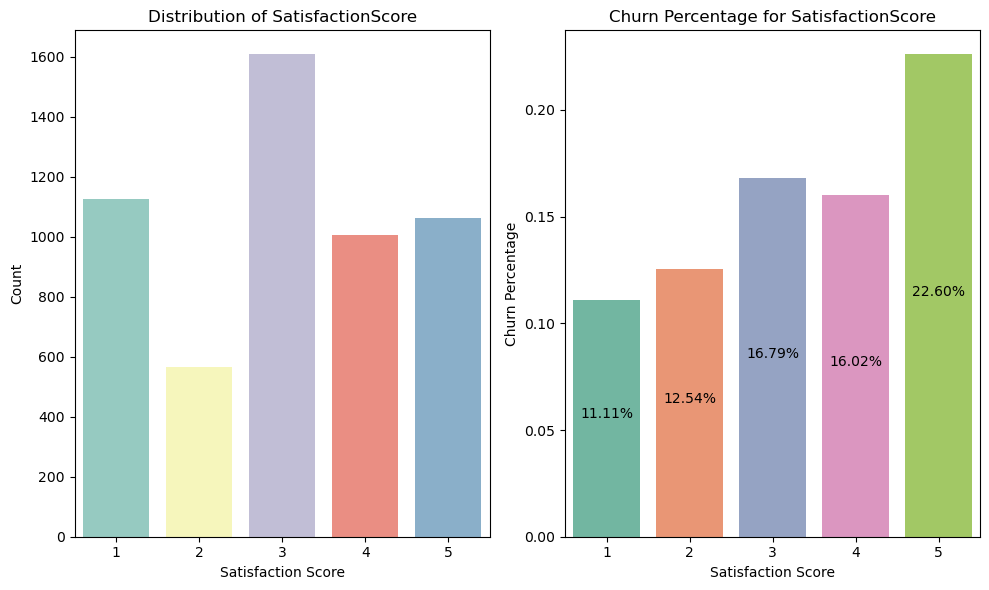

In [31]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of SatisfactionScore
sns.countplot(x='SatisfactionScore', data=df, palette='Set3', ax=ax1)
ax1.set_title('Distribution of SatisfactionScore')
ax1.set_xlabel('Satisfaction Score')
ax1.set_ylabel('Count')

# Plot the churn percentage for SatisfactionScore
ax2 = sns.barplot(x='SatisfactionScore', y='Churn', data=df, palette='Set2', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for SatisfactionScore')
ax2.set_xlabel('Satisfaction Score')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the first subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2.),
                 ha='center', va='baseline')

plt.tight_layout()
plt.show()


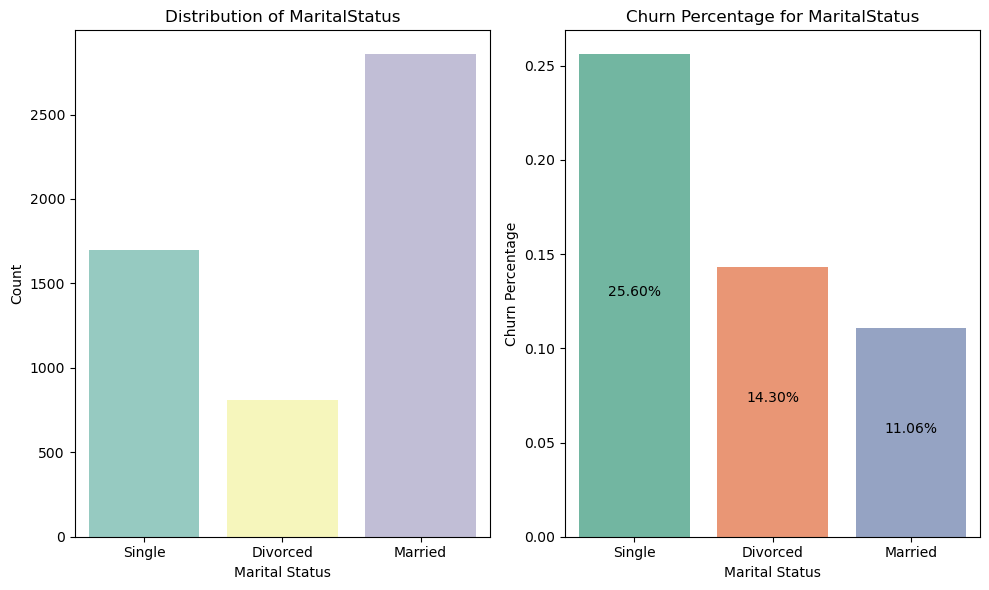

In [32]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of MaritalStatus
sns.countplot(x='MaritalStatus', data=df, palette='Set3', ax=ax1)
ax1.set_title('Distribution of MaritalStatus')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')

# Plot the churn percentage for MaritalStatus
ax2 = sns.barplot(x='MaritalStatus', y='Churn', data=df, palette='Set2', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for MaritalStatus')
ax2.set_xlabel('Marital Status')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the first subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2.),
                 ha='center', va='baseline')

plt.tight_layout()
plt.show()


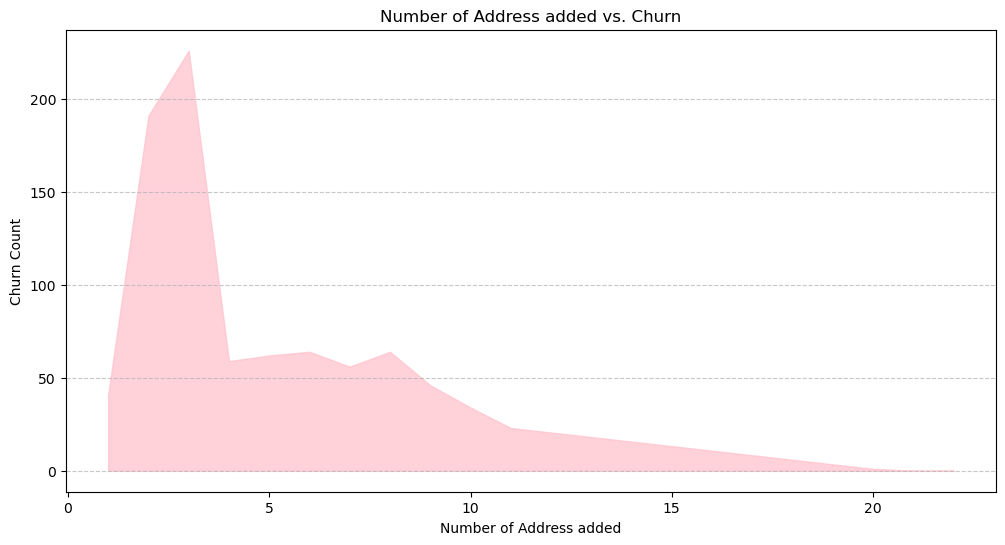

In [33]:
# Group the data by "NumberofAddress" and calculate the sum of churn for each amount
NumberofAddress_churn = df.groupby('NumberOfAddress')['Churn'].sum()

# Create an area plot
plt.figure(figsize=(12, 6))
plt.fill_between(NumberofAddress_churn.index, NumberofAddress_churn.values, color='pink', alpha=0.7)
plt.title('Number of Address added vs. Churn')
plt.xlabel('Number of Address added')
plt.ylabel('Churn Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


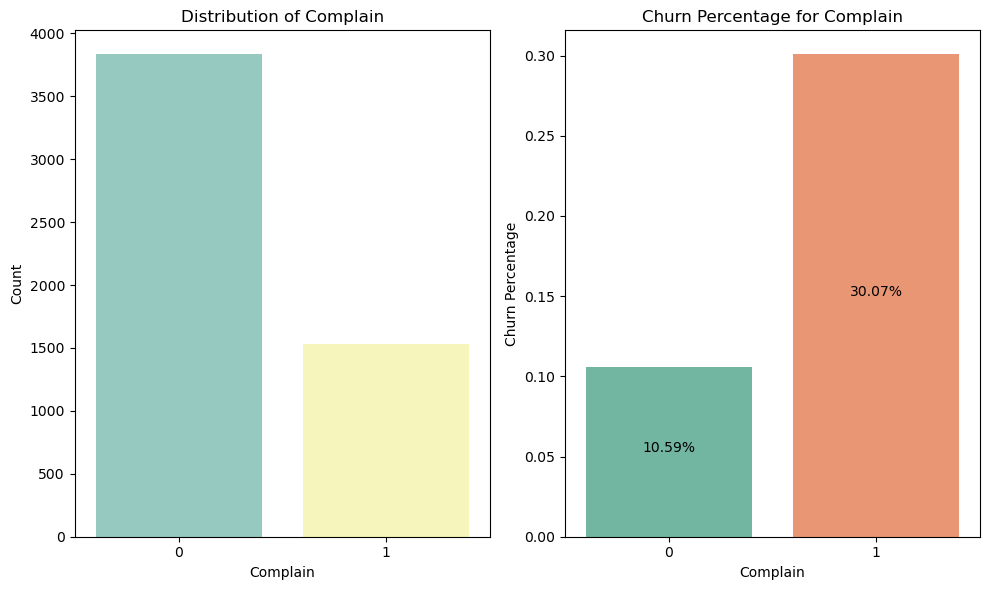

In [34]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the distribution of Complain
sns.countplot(x='Complain', data=df, palette='Set3', ax=ax1)
ax1.set_title('Distribution of Complain')
ax1.set_xlabel('Complain')
ax1.set_ylabel('Count')

# Plot the churn percentage for Complain
ax2 = sns.barplot(x='Complain', y='Churn', data=df, palette='Set2', ci=None, ax=ax2)
ax2.set_title('Churn Percentage for Complain')
ax2.set_xlabel('Complain')
ax2.set_ylabel('Churn Percentage')

# Display percentages on top of each bar in the first subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2.),
                 ha='center', va='baseline')

plt.tight_layout()
plt.show()


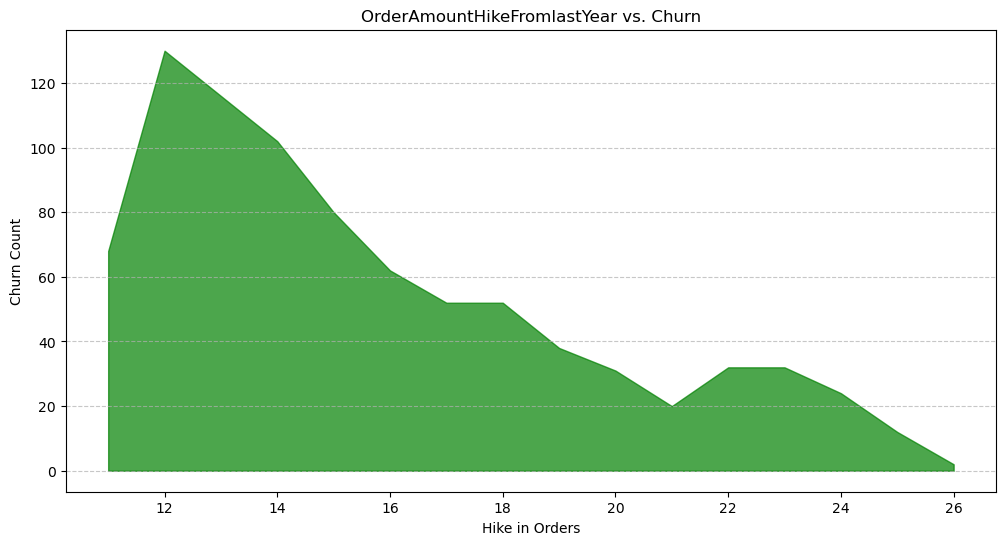

In [35]:
# Group the data by "OrderAmountHikeFromlastYear" and calculate the sum of churn for each amount
OrderAmountHikeFromlastYear_churn = df.groupby('OrderAmountHikeFromlastYear')['Churn'].sum()

# Create an area plot
plt.figure(figsize=(12, 6))
plt.fill_between(OrderAmountHikeFromlastYear_churn.index, OrderAmountHikeFromlastYear_churn.values, color='green', alpha=0.7)
plt.title('OrderAmountHikeFromlastYear vs. Churn')
plt.xlabel('Hike in Orders')
plt.ylabel('Churn Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


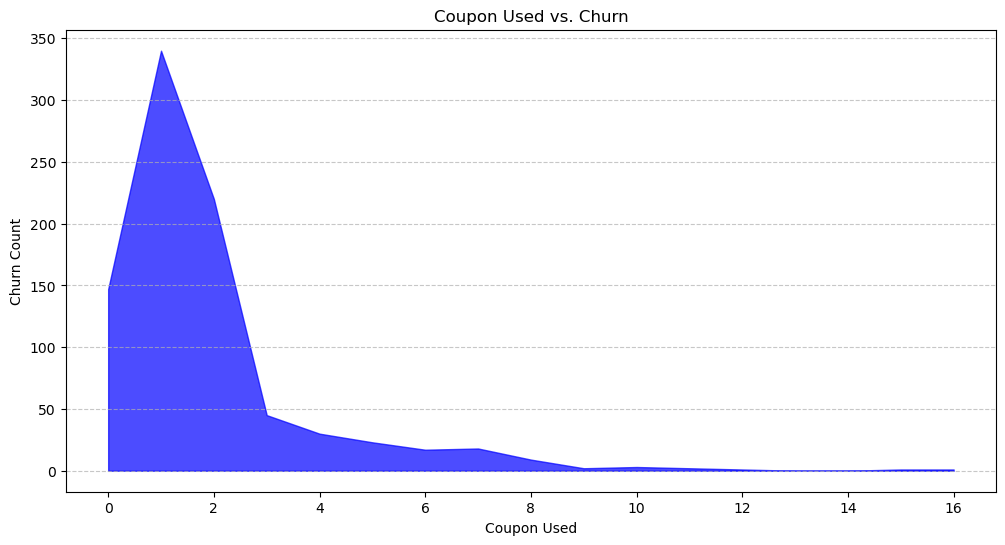

In [36]:
# Group the data by "CouponUsed" and calculate the sum of churn for each amount
CouponUsed_churn = df.groupby('CouponUsed')['Churn'].sum()

# Create an area plot
plt.figure(figsize=(12, 6))
plt.fill_between(CouponUsed_churn.index, CouponUsed_churn.values, color='blue', alpha=0.7)
plt.title('Coupon Used vs. Churn')
plt.xlabel('Coupon Used')
plt.ylabel('Churn Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


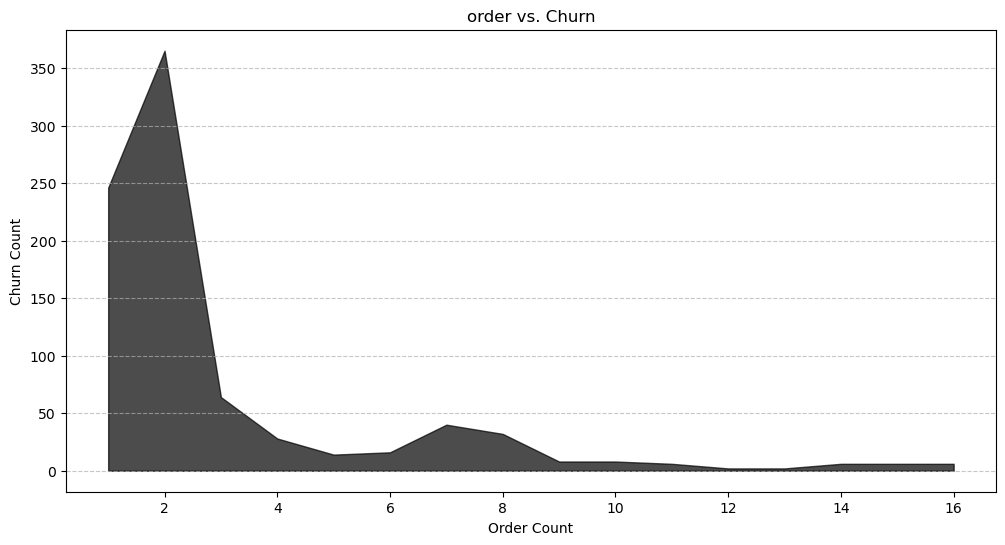

In [37]:
# Group the data by "OrderCount" and calculate the sum of churn for each amount
OrderCount_churn = df.groupby('OrderCount')['Churn'].sum()

# Create an area plot
plt.figure(figsize=(12, 6))
plt.fill_between(OrderCount_churn.index, OrderCount_churn.values, color='Black', alpha=0.7)
plt.title('order vs. Churn')
plt.xlabel('Order Count')
plt.ylabel('Churn Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


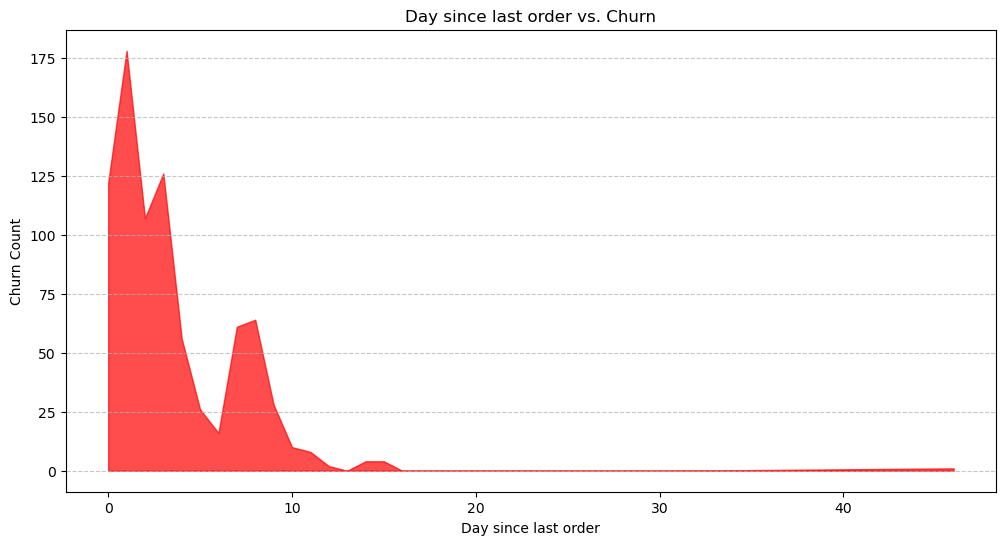

In [38]:
# Group the data by "DaySinceLastOrder" and calculate the sum of churn for each amount
DaySinceLastOrder_churn = df.groupby('DaySinceLastOrder')['Churn'].sum()

# Create an area plot
plt.figure(figsize=(12, 6))
plt.fill_between(DaySinceLastOrder_churn.index, DaySinceLastOrder_churn.values, color='red', alpha=0.7)
plt.title('Day since last order vs. Churn')
plt.xlabel('Day since last order')
plt.ylabel('Churn Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


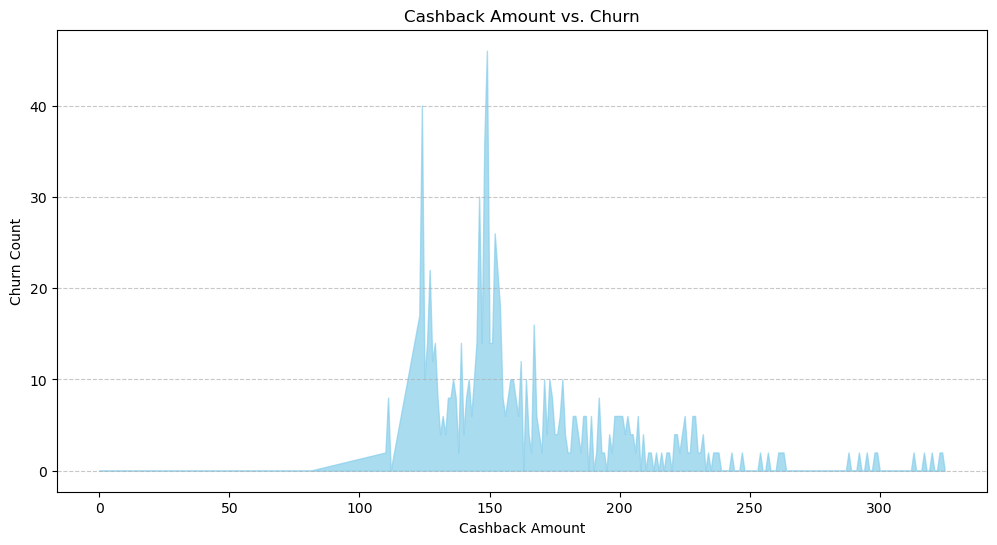

In [39]:
# Group the data by "CashbackAmount" and calculate the sum of churn for each amount
cashback_churn = df.groupby('CashbackAmount')['Churn'].sum()

# Create an area plot
plt.figure(figsize=(12, 6))
plt.fill_between(cashback_churn.index, cashback_churn.values, color='skyblue', alpha=0.7)
plt.title('Cashback Amount vs. Churn')
plt.xlabel('Cashback Amount')
plt.ylabel('Churn Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
churn     = df[df["Churn"] == 1]
not_churn = df[df["Churn"] == 0]

In [41]:
#Separating catagorical and numerical columns
Id_col     = ['CustomerID']
target_col = ["Churn"]
cat_cols   = df.keys().tolist()


In [42]:
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()

In [43]:
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

In [44]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn vs. Non-Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)

py.iplot(fig)


In [45]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    


In [46]:
for i in cat_cols :
    plot_pie(i)

In [47]:

#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [48]:
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)
plt.show()

In [49]:
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "Tenure",
                                       values = df["Tenure"]),
                                  dict(label  = 'WarehouseToHome',
                                       values = df['WarehouseToHome']),
                                  dict(label  = 'HourSpendOnApp',
                                       values = df['HourSpendOnApp']),
                                  dict(label  = 'NumberOfDeviceRegistered',
                                       values = df['NumberOfDeviceRegistered']),
                                  dict(label  = 'WarehouseToHome',
                                       values = df['WarehouseToHome']),
                                  dict(label  = 'OrderAmountHikeFromlastYear',
                                       values = df['OrderAmountHikeFromlastYear']),
                                  dict(label  = 'CouponUsed',
                                       values = df['CouponUsed']),
                                  dict(label  = 'OrderCount',
                                       values = df['OrderCount']),
                                  dict(label  = 'DaySinceLastOrder',
                                       values = df['DaySinceLastOrder']),
                                  dict(label  = 'CashbackAmount',
                                       values = df['CashbackAmount']),
                                  dict(label  = 'NumberOfAddress',
                                       values = df['NumberOfAddress'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 2000,
                            width  = 2000,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

In [50]:
#scatter plot matrix
scatter_matrix(df)

In [51]:
#customer id col
Id_col     = ['CustomerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [52]:
# List of columns with missing values
columns_with_missing = ['WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Fill missing values with the mean of each column
for column in columns_with_missing:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


In [53]:
num_cols

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [54]:
cols = df.keys().tolist()

In [55]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols)

In [56]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [57]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5366 non-null   float64
 1   WarehouseToHome              5366 non-null   float64
 2   HourSpendOnApp               5366 non-null   float64
 3   NumberOfDeviceRegistered     5366 non-null   float64
 4   NumberOfAddress              5366 non-null   float64
 5   OrderAmountHikeFromlastYear  5366 non-null   float64
 6   CouponUsed                   5366 non-null   float64
 7   OrderCount                   5366 non-null   float64
 8   DaySinceLastOrder            5366 non-null   float64
 9   CashbackAmount               5366 non-null   float64
dtypes: float64(10)
memory usage: 419.3 KB


In [58]:
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [59]:
df

CustomerID  Churn  PreferredLoginDevice  Gender  Complain  CityTier_1  \
0          50001      1                     1       0         1           0   
1          50004      1                     1       1         0           0   
2          50005      1                     1       1         0           1   
3          50006      1                     0       0         1           1   
4          50009      1                     1       1         1           0   
...          ...    ...                   ...     ...       ...         ...   
5361       55626      0                     0       1         0           1   
5362       55627      0                     1       1         0           1   
5363       55628      0                     1       1         1           1   
5364       55629      0                     0       1         0           0   
5365       55630      0                     1       1         0           1   

      CityTier_2  CityTier_3  PreferredPaymentMode_CC  \
0              0           1                        0   
1              0           1                        0   
2              0           0                        1   
3              0           0                        0   
4              0           1                        0   
...          ...         ...                      ...   
5361           0           0                        1   
5362           0           0                        1   
5363           0           0                        0   
5364           0           1                        1   
5365           0           0                        1   

      PreferredPaymentMode_COD  ...    Tenure  WarehouseToHome  \
0                            0  ... -0.723420        -1.159070   
1                            0  ... -1.190904        -0.083417   
2                            0  ... -1.190904        -0.441968   
3                            0  ... -1.190904         0.753203   
4                            0  ...  0.328419        -0.800519   
...                        ...  ...       ...              ...   
5361                         0  ... -0.022194         1.709340   
5362                         0  ...  0.328419        -0.322451   
5363                         0  ... -1.074033        -0.561485   
5364                         0  ...  1.497129        -0.800519   
5365                         0  ... -0.255936        -0.083417   

      HourSpendOnApp  NumberOfDeviceRegistered  NumberOfAddress  \
0       6.297638e-02                 -0.691095         1.829213   
1      -1.354963e+00                  0.281732         1.442637   
2      -6.296917e-16                 -0.691095        -0.490244   
3       6.297638e-02                  1.254558        -0.876821   
4      -6.296917e-16                  0.281732        -0.876821   
...              ...                       ...              ...   
5361    6.297638e-02                 -1.663921         0.669484   
5362    6.297638e-02                  1.254558         0.669484   
5363    6.297638e-02                 -1.663921        -0.490244   
5364    1.480916e+00                  1.254558        -0.103668   
5365    6.297638e-02                 -1.663921        -0.103668   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                       -1.321088   -0.431424   -0.718597           0.091490   
1                        2.025479   -0.966127   -0.718597          -0.470903   
2                       -1.321088   -0.431424   -0.718597          -0.470903   
3                        1.746598    1.172683    1.000973           0.653884   
4                       -0.484446   -0.966127   -0.718597          -0.752100   
...                           ...         ...         ...                ...   
5361                     0.631076   -0.431424   -0.374683          -0.189706   
5362                     0.073315   -0.431424   -0.374683           0.000000   
5363                     1.467717   -0.431424   -0.374

In [60]:
summary = df.describe().transpose()
summary

count          mean          std  \
CustomerID                           5366.0  5.288648e+04  1622.164976   
Churn                                5366.0  1.615729e-01     0.368093   
PreferredLoginDevice                 5366.0  7.107715e-01     0.453446   
Gender                               5366.0  5.995155e-01     0.490042   
Complain                             5366.0  2.856877e-01     0.451783   
CityTier_1                           5366.0  6.466642e-01     0.478050   
CityTier_2                           5366.0  4.062616e-02     0.197441   
CityTier_3                           5366.0  3.127097e-01     0.463640   
PreferredPaymentMode_CC              5366.0  3.142005e-01     0.464240   
PreferredPaymentMode_COD             5366.0  8.945211e-02     0.285422   
PreferredPaymentMode_DC              5366.0  4.114797e-01     0.492148   
PreferredPaymentMode_E wallet        5366.0  1.120015e-01     0.315398   
PreferredPaymentMode_UPI             5366.0  7.286619e-02     0.259941   
PreferedOrderCat_Fashion             5366.0  1.539322e-01     0.360917   
PreferedOrderCat_Grocery             5366.0  7.640701e-02     0.265673   
PreferedOrderCat_Laptop & Accessory  5366.0  3.799851e-01     0.485428   
PreferedOrderCat_Mobile              5366.0  3.404771e-01     0.473914   
PreferedOrderCat_Others              5366.0  4.919866e-02     0.216303   
SatisfactionScore_1                  5366.0  2.096534e-01     0.407099   
SatisfactionScore_2                  5366.0  1.054789e-01     0.307198   
SatisfactionScore_3                  5366.0  2.996646e-01     0.458154   
SatisfactionScore_4                  5366.0  1.872903e-01     0.390181   
SatisfactionScore_5                  5366.0  1.979128e-01     0.398463   
MaritalStatus_Divorced               5366.0  1.511368e-01     0.358216   
MaritalStatus_Married                5366.0  5.322400e-01     0.499006   
MaritalStatus_Single                 5366.0  3.166232e-01     0.465202   
tenure_group_Tenure_12-24            5366.0  2.733880e-01     0.445740   
tenure_group_Tenure_24-48            5366.0  7.920239e-02     0.270080   
tenure_group_Tenure_gt_48            5366.0  7.454342e-04     0.027295   
tenure_group_Tenure_lt_12            5366.0  6.466642e-01     0.478050   
Tenure                               5366.0  6.925963e-17     1.000093   
WarehouseToHome                      5366.0 -3.949713e-16     1.000093   
HourSpendOnApp                       5366.0  2.032664e-14     1.000093   
NumberOfDeviceRegistered             5366.0  7.733988e-15     1.000093   
NumberOfAddress                      5366.0  4.913290e-15     1.000093   
OrderAmountHikeFromlastYear          5366.0 -4.182268e-16     1.000093   
CouponUsed                           5366.0 -1.738561e-15     1.000093   
OrderCount                           5366.0  2.464919e-15     1.000093   
DaySinceLastOrder                    5366.0 -1.090371e-15     1.000093   
CashbackAmount                       5366.0 -8.133118e-16     1.000093   

                                              min           25%           50%  \
CustomerID                           50001.000000  51484.250000  52947.500000   
Churn                                    0.000000      0.000000      0.000000   
PreferredLoginDevice                     0.000000      0.000000      1.000000   
Gender                                   0.000000      0.000000      1.000000   
Complain                                 0.000000      0.000000      0.000000   
CityTier_1                               0.000000      0.000000      1.000000   
CityTier_2                               0.000000      0.000000      0.000000   
CityTier_3                               0.000000      0.000000      0.000000   
PreferredPaymentMode_CC                  0.000000      0.000000      0.000000   
PreferredPaymentMode_COD                 0.000000      0.000000      0.000000   
PreferredPaymentMode_DC                  0.000000      0.000000      0.000000   
PreferredPaymentMode_E wallet  

In [61]:
# To make it look nice we can do some additional stuff if needed
summary = (df[[i for i in df.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [62]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [63]:
#convert to array
corr_array  = np.array(correlation)

In [64]:
correlation

CustomerID     Churn  \
CustomerID                             1.000000 -0.001659   
Churn                                 -0.001659  1.000000   
PreferredLoginDevice                  -0.004384 -0.048286   
Gender                                 0.008437  0.030194   
Complain                              -0.010738  0.239084   
CityTier_1                             0.002237 -0.082259   
CityTier_2                             0.027040  0.012252   
CityTier_3                            -0.013821  0.079598   
PreferredPaymentMode_CC                0.000373 -0.036444   
PreferredPaymentMode_COD               0.001712  0.071755   
PreferredPaymentMode_DC                0.000480 -0.041931   
PreferredPaymentMode_E wallet         -0.014017  0.059235   
PreferredPaymentMode_UPI               0.013552 -0.006185   
PreferedOrderCat_Fashion              -0.025550 -0.007659   
PreferedOrderCat_Grocery              -0.010442 -0.088143   
PreferedOrderCat_Laptop & Accessory   -0.019945 -0.126688   
PreferedOrderCat_Mobile                0.054155  0.209219   
PreferedOrderCat_Others               -0.018434 -0.053037   
SatisfactionScore_1                    0.138172 -0.070613   
SatisfactionScore_2                   -0.208138 -0.033710   
SatisfactionScore_3                    0.002726  0.011263   
SatisfactionScore_4                    0.013552 -0.001792   
SatisfactionScore_5                    0.002895  0.086936   
MaritalStatus_Divorced                -0.243354 -0.021254   
MaritalStatus_Married                  0.176627 -0.147600   
MaritalStatus_Single                  -0.002074  0.174692   
tenure_group_Tenure_12-24              0.008539 -0.161348   
tenure_group_Tenure_24-48             -0.000162 -0.128747   
tenure_group_Tenure_gt_48              0.005818 -0.011990   
tenure_group_Tenure_lt_12             -0.008202  0.223865   
Tenure                                 0.029952 -0.349408   
WarehouseToHome                        0.053892  0.077792   
HourSpendOnApp                         0.581644  0.030822   
NumberOfDeviceRegistered               0.411257  0.111855   
NumberOfAddress                        0.152561  0.051184   
OrderAmountHikeFromlastYear            0.114328 -0.005331   
CouponUsed                             0.211635  0.002955   
OrderCount                             0.116687 -0.017928   
DaySinceLastOrder                      0.084298 -0.144582   
CashbackAmount                         0.177207 -0.142816   

                                     PreferredLoginDevice    Gender  Complain  \
CustomerID                                      -0.004384  0.008437 -0.010738   
Churn                                           -0.048286  0.030194  0.239084   
PreferredLoginDevice                             1.000000 -0.019756  0.003082   
Gender                                          -0.019756  1.000000 -0.040460   
Complain                                         0.003082 -0.040460  1.000000   
CityTier_1                                      -0.007203  0.013273  0.006614   
CityTier_2                                       0.006354  0.041044 -0.013122   
CityTier_3                                       0.004721 -0.031164 -0.001231   
PreferredPaymentMode_CC                          0.003222 -0.012112  0.008292   
PreferredPaymentMode_COD                         0.018477  0.005640 -0.018979   
PreferredPaymentMode_DC                         -0.039576  0.004846 -0.010729   
PreferredPaymentMode_E wallet                    0.041479 -0.026904  0.008243   
PreferredPaymentMode_UPI                        -0.001442  0.038907  0.016342   
PreferedOrderCat_Fashion                         0.019251 -0.024450  0.006884   
PreferedOrderCat_Grocery                         0.010187 -0.048393  0.013771   
PreferedOrderCat_Laptop & Accessory             -0.050184 -0.019912 -0.024237   
PreferedOrderCat_Mobile                          0.009906  0.050311  0.018324   
PreferedOrderCat_Others                          0.046286  0.034691 -0.014156

In [65]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Part 2

In [66]:
# Import all the modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

In [67]:
#splitting train and test data 
train,test = train_test_split(df,test_size = .20 ,random_state = 1111)

In [68]:
#seperating dependent and independent variables
cols    = [i for i in df.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

In [69]:
classifier = LogisticRegression(random_state = 101)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=101)

In [70]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [71]:
classifier.coef_

array([[-4.05381736e-01,  2.52124397e-01,  1.70080544e+00,
        -5.23972893e-01,  3.85584420e-01,  1.40640723e-01,
        -3.03288270e-01,  3.85428520e-01, -1.02295932e-01,
         4.51223581e-01, -4.28815649e-01,  1.39701109e-01,
         1.99707523e-01, -1.54718756e+00, -6.16061998e-01,
         1.82609317e+00, -4.82356451e-01, -5.08274047e-01,
         2.00534921e-01,  1.80390934e-01,  6.11956895e-01,
        -3.01821659e-02, -4.80460248e-01,  5.12894665e-01,
         1.21850572e+00, -2.22416805e-01,  5.94774162e-04,
        -9.94431438e-01, -2.86655261e+00,  2.97765293e-01,
        -1.06705721e-01,  4.13137775e-01,  6.73882198e-01,
        -2.41302110e-02,  6.32852116e-02,  4.37156557e-01,
        -3.10166602e-01, -5.97122997e-01]])

In [72]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)
precision_score(Y_test, y_pred)
recall_score(Y_test, y_pred)
f1_score(Y_test, y_pred)

0.6428571428571428

Test Data Accuracy: 0.9069


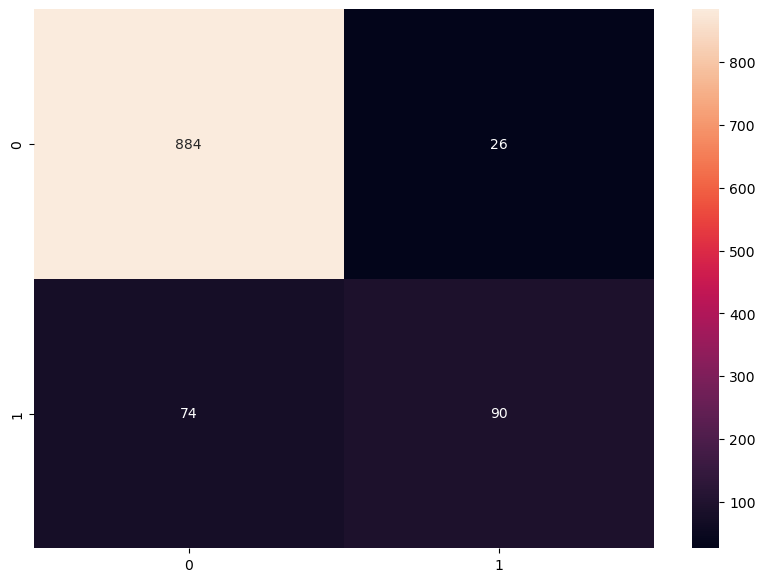

In [73]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

In [74]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [75]:
# Predicting test set
y_pred = model_tree.predict(X_test)

In [76]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)
precision_score(Y_test, y_pred)
recall_score(Y_test, y_pred)
f1_score(Y_test, y_pred)

0.8830409356725146

Test Data Accuracy: 0.9628


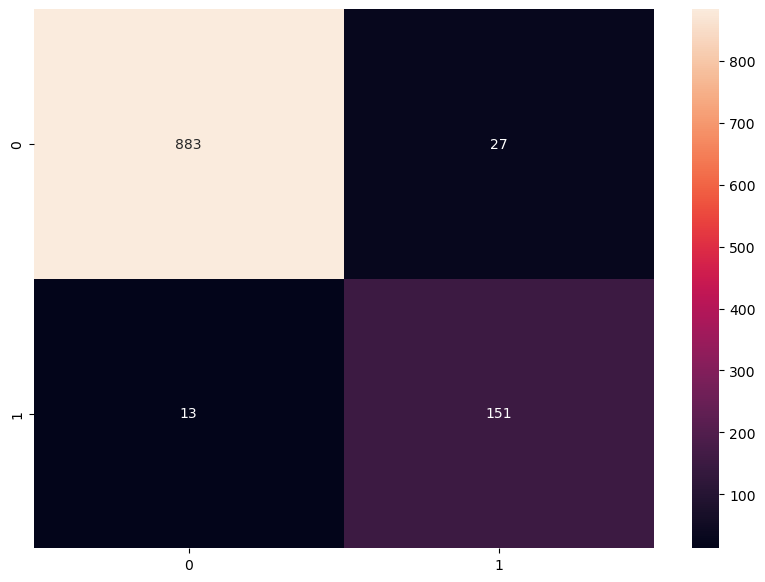

In [77]:
# Build Confusion Matrix

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

In [78]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y =Y_train, cv =10)

In [79]:
# Check for accuracies
accuracies

array([0.88604651, 0.89302326, 0.92307692, 0.8997669 , 0.8974359 ,
       0.8974359 , 0.8974359 , 0.91608392, 0.87878788, 0.88344988])

In [80]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], 
                                                                              axis = 1)

features      Coef
0                  PreferredLoginDevice -0.405382
1                                Gender  0.252124
2                              Complain  1.700805
3                            CityTier_1 -0.523973
4                            CityTier_2  0.385584
5                            CityTier_3  0.140641
6               PreferredPaymentMode_CC -0.303288
7              PreferredPaymentMode_COD  0.385429
8               PreferredPaymentMode_DC -0.102296
9         PreferredPaymentMode_E wallet  0.451224
10             PreferredPaymentMode_UPI -0.428816
11             PreferedOrderCat_Fashion  0.139701
12             PreferedOrderCat_Grocery  0.199708
13  PreferedOrderCat_Laptop & Accessory -1.547188
14              PreferedOrderCat_Mobile -0.616062
15              PreferedOrderCat_Others  1.826093
16                  SatisfactionScore_1 -0.482356
17                  SatisfactionScore_2 -0.508274
18                  SatisfactionScore_3  0.200535
19                  SatisfactionScore_4  0.180391
20                  SatisfactionScore_5  0.611957
21               MaritalStatus_Divorced -0.030182
22                MaritalStatus_Married -0.480460
23                 MaritalStatus_Single  0.512895
24            tenure_group_Tenure_12-24  1.218506
25            tenure_group_Tenure_24-48 -0.222417
26            tenure_group_Tenure_gt_48  0.000595
27            tenure_group_Tenure_lt_12 -0.994431
28                               Tenure -2.866553
29                      WarehouseToHome  0.297765
30                       HourSpendOnApp -0.106706
31             NumberOfDeviceRegistered  0.413138
32                      NumberOfAddress  0.673882
33          OrderAmountHikeFromlastYear -0.024130
34                           CouponUsed  0.063285
35                           OrderCount  0.437157
36                    DaySinceLastOrder -0.310167
37                       CashbackAmount -0.597123

In [81]:

from sklearn.feature_selection import RFE 
classifier = LogisticRegression()
rfe = RFE(classifier, n_features_to_select = 10)
rfe = rfe.fit(X_train, Y_train)

In [82]:
print(rfe.support_)

[False False  True  True False False False False False False False False
 False  True False  True  True  True False False False False False  True
  True False False  True  True False False False False False False False
 False False]


In [83]:
X_train.columns[rfe.support_]

Index(['Complain', 'CityTier_1', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Others', 'SatisfactionScore_1', 'SatisfactionScore_2',
       'MaritalStatus_Single', 'tenure_group_Tenure_12-24',
       'tenure_group_Tenure_lt_12', 'Tenure'],
      dtype='object')

In [84]:
rfe.ranking_

array([ 9, 14,  1,  1, 16, 22, 18,  3, 24,  4, 15, 23, 21,  1,  6,  1,  1,
        1, 19, 20, 10, 27,  5,  1,  1, 17, 29,  1,  1, 13, 25,  8,  2, 28,
       26, 11, 12,  7])

In [85]:
# Build the model again after Feature Selection
classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train[X_train.columns[rfe.support_]], Y_train)


LogisticRegression(random_state=2)

In [86]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)
precision_score(Y_test, y_pred)
recall_score(Y_test, y_pred)
f1_score(Y_test, y_pred)

0.8830409356725146

Test Data Accuracy: 0.9628


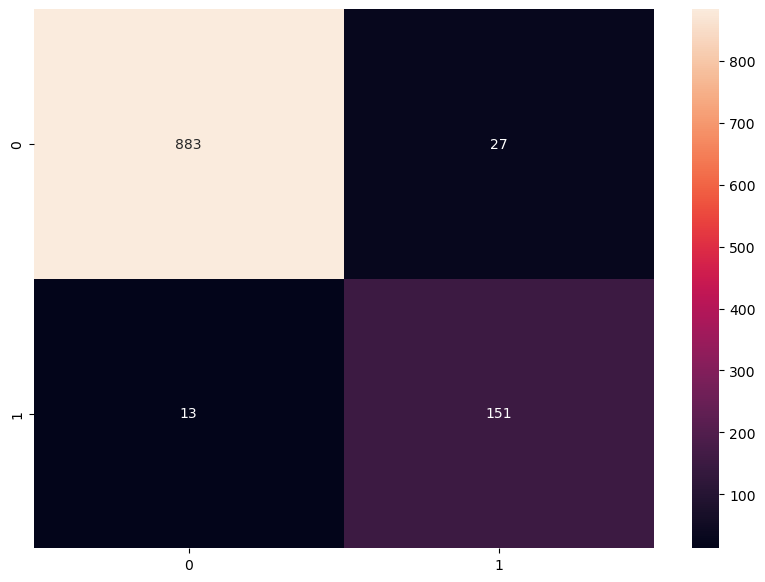

In [87]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

In [88]:
# Subset the coefficents for RFE
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], axis = 1)

features      Coef
0                             Complain  1.541667
1                           CityTier_1 -0.828842
2  PreferedOrderCat_Laptop & Accessory -1.019069
3              PreferedOrderCat_Others  0.548032
4                  SatisfactionScore_1 -0.822157
5                  SatisfactionScore_2 -0.671318
6                 MaritalStatus_Single  0.788275
7            tenure_group_Tenure_12-24  1.255609
8            tenure_group_Tenure_lt_12 -0.992201
9                               Tenure -2.591952

In [89]:
final_results = pd.concat([Y_test, df.CustomerID], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['CustomerID', 'Churn', 'predicted_churn']].reset_index(drop = True)

In [90]:
final_results

CustomerID  Churn  predicted_churn
0          51593    0.0                0
1          55145    0.0                0
2          52969    0.0                0
3          55061    0.0                0
4          51998    0.0                0
...          ...    ...              ...
1069       54310    0.0                1
1070       50513    0.0                0
1071       53086    0.0                0
1072       53162    0.0                0
1073       53267    0.0                0

[1074 rows x 3 columns]